#Kuler Preference

###Summary
- 07/06/15
    - We finally implement user preference in a clustering analysis (kmeans).
    - Scale preference (normalize) -> come up with an integer for # of likes -> duplicate -> run kmeans

##Import modules

In [6]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import scipy as sp

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltcm
%matplotlib inline

##Load dataframes and ndarrays

In [7]:
df = pd.read_pickle('kuler_df')
df_ = pd.read_pickle('kuler_df_')
df_all = pd.read_pickle('kuler_df_all')
data_pair = np.load('kuler_data_pair.npy')
data_LabAll = np.load('kuler_data_LabAll.npy')

- Concatenate Likes to data_LabAll (df2)

In [114]:
df2 = DataFrame(data_LabAll)
df2['Likes']=df.Likes

##I. Feature scaling

In [115]:
df.Likes.describe()

count     4931.000000
mean       224.492801
std        498.726783
min         62.000000
25%         78.000000
50%        108.000000
75%        188.000000
max      13707.000000
Name: Likes, dtype: float64

- Problem: "Likes" has a very long tail and the range of number of Likes is large.
- Possible solution: log transformation
    - natural log -> normalize to make the smallest value 0 (# of duplicates) -> round up to convert float to int

In [169]:
# create a new column for log-normalized likes
df2['Likes_norm'] = np.round(np.log(df2.Likes)-np.min(np.log(df2.Likes)))

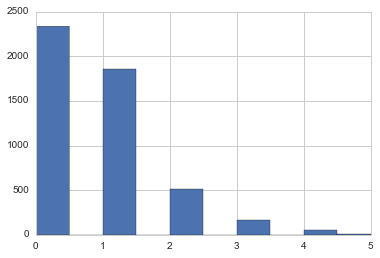

In [170]:
df2['Likes_norm'].hist()

####Plan
- loop over the rows with likes_norm > 0
- for each row, generate a DataFrame ([array,]*n_duplicate)
- concatenate (ignore_index=True)

###1. Find the row numbers to loop for

In [247]:
# the data is already sorted by the number of likes
# find the last row with non-zero norm-likes
row_max = int(df2[df2.Likes_norm==1][-1:].index[0])

###2. Create a duplicate DataFrame

In [248]:
# initialize
df_dup = DataFrame()
for i in range(row_max):
    # number of duplicate copies
    n_duplicate = df2.loc[i].Likes_norm
    # create duplicates for the corresponding row
    temp = DataFrame([df2.loc[i].values,]*n_duplicate)
    # concatenate the duplicates
    df_dup = pd.concat([df_dup,temp],ignore_index=True)

###3. Concatenate with the parent (df2)

In [254]:
df3 = pd.concat([df2,df_dup],ignore_index=True)